In [1]:
import tensorflow as tf    # deep learning library
mnist = tf.keras.datasets.mnist     # dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train), (x_test,y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis=1)  # scales data between 0 and 1
x_test = tf.keras.utils.normalize(x_test, axis=1)  # scales data between 0 and 1

# A sequential model(things will go in direct order)
# A feed forward model, no going backwards... for now
model = tf.keras.models.Sequential()    # A basic feed-forward model

model.add(tf.keras.layers.Flatten())    # takes our 28x28 and makes it 1x784

In [2]:
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))

model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

model.compile(optimizer ='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2556 - accuracy: 0.9257
Epoch 2/3
60000/60000 [==============================] - 4s 74us/sample - loss: 0.1024 - accuracy: 0.9690
Epoch 3/3
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0699 - accuracy: 0.9778


In [3]:
val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample with the model
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 1s 69us/sample - loss: 0.1026 - accuracy: 0.9679
0.10259217570899054
0.9679


In [4]:
model.save('epic_num_reader.model')

new_model = tf.keras.models.load_model('epic_num_reader.model')

predictions = new_model.predict(x_test)
print(predictions)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: epic_num_reader.model\assets
[[3.9498329e-09 3.2087804e-08 8.5658030e-06 ... 9.9979931e-01
  5.9567565e-08 4.7693975e-06]
 [3.6511820e-09 5.5596820e-04 9.9943954e-01 ... 1.1416502e-08
  1.5733648e-06 2.5741325e-12]
 [3.6634643e-07 9.9840242e-01 3.1665812e-05 ... 6.8274268e-05
  1.2680787e-03 6.0093416e-06]
 ...
 [8.0196783e-09 1.8462624e-06 5.9829250e-07 ... 1.9670359e-05
  1.7804481e-05 1.4060561e-03]
 [2.3572899e-09 7.4891403e-08 1.5159314e-09 ... 6.9990449e-08
  2.2496830e-05 1.8140753e-10]
 [6.6919705e-07 1.2104672e-07 8.2245151e-07 ... 2.2591160e-09
  2.4728295e-05 5.5213494e-08]]


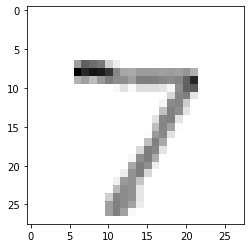

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()
#getting the 1st image with a number

In [10]:
import numpy as np

print(np.argmax(predictions[0]))
# asking the model to predict what number is the 1st image.

7
